In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os, os.path, pickle, sys

from scipy import stats
import pymannkendall as mk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm
# plt.rc("font", family="Times")

from datetime import datetime

In [2]:
sys.path.append("/Users/hn/Documents/00_GitHub/Ag_Others/Ehsan/Wheat/")
import wheat_core as wc

In [3]:
data_dir_base = "/Users/hn/Documents/01_research_data/Ehsan/wheat/"
wheat_reOrganized = data_dir_base + "wheat_reOrganized/"

wheat_plot_dir = data_dir_base + "plots/"
os.makedirs(wheat_plot_dir, exist_ok=True)

In [4]:
dpi_ = 200

In [5]:
data_ = pd.read_pickle(wheat_reOrganized + "average_and_seperate_varieties.sav")
list(data_.keys())

['averaged_varieties_weekly',
 'separate_varieties_weekly',
 'separate_varieties_annual',
 'averaged_varieties_annual',
 'separate_varieties_4season',
 'averaged_varieties_4season',
 'dates',
 'source_code',
 'Author',
 'Date']

In [6]:
averaged_varieties_weekly = data_["averaged_varieties_weekly"]
separate_varieties_weekly = data_["separate_varieties_weekly"]

separate_varieties_annual = data_["separate_varieties_annual"]
averaged_varieties_annual = data_["averaged_varieties_annual"]

separate_varieties_4season = data_["separate_varieties_4season"]
averaged_varieties_4season = data_["averaged_varieties_4season"]

dates = data_["dates"]

separate_varieties_annual.head(2)

,location,year,variety,yield,year_gdd,year_dgdd,year_precip
0,Almira,2005,Alpowa,43.9,2181.91,260.585,102.1
1,Almira,2005,Alturas,37.7,2181.91,260.585,102.1


### GDD Spearman test

In [7]:
yield_TS = separate_varieties_annual["yield"].values
GDD_TS = separate_varieties_annual["year_gdd"].values
Spearman, p_valueSpearman = stats.spearmanr(GDD_TS, yield_TS)
print (Spearman.round(3), p_valueSpearman.round(7))

0.146 0.0


In [8]:
DF = separate_varieties_annual.copy() # make the lines shorter!
GDD_spear = DF["variety"].copy()
GDD_spear.drop_duplicates(inplace=True)

spearman_test_cols = ["spearman", "p_valSpearman"]
GDD_spear = pd.concat([GDD_spear, pd.DataFrame(columns = spearman_test_cols)])
GDD_spear[spearman_test_cols] = [-666, -666] * (len(spearman_test_cols)-1)

for a_variety in GDD_spear["variety"].unique():
    yield_TS = DF.loc[DF["variety"]==a_variety, "yield"].values
    GDD_TS = DF.loc[DF["variety"]==a_variety, "year_gdd"].values
    Spearman, p_valueSpearman = stats.spearmanr(GDD_TS, yield_TS)
    L_ = [Spearman, p_valueSpearman]
    GDD_spear.loc[GDD_spear["variety"]==a_variety, spearman_test_cols] = L_

GDD_spear["spearman"] = GDD_spear["spearman"].round(2)
GDD_spear["p_valSpearman"] = GDD_spear["p_valSpearman"].round(4)

GDD_spear.sort_values(by= ['variety'], inplace=True)
GDD_spear.reset_index(drop=True, inplace=True)

idx_max = GDD_spear["spearman"].idxmax()
print (GDD_spear.loc[idx_max, "spearman"], GDD_spear.loc[idx_max, "p_valSpearman"])
idx_min = GDD_spear["spearman"].idxmin()
print (GDD_spear.loc[idx_min, "spearman"], GDD_spear.loc[idx_min, "p_valSpearman"])

GDD_spear

0.22 0.0092
0.08 0.4429


,variety,spearman,p_valSpearman
0,Alpowa,0.16,0.0561
1,Alturas,0.12,0.1593
2,Babe,0.16,0.0369
3,Diva,0.12,0.1046
4,Louise,0.10,0.1194
5,Nick,0.18,0.0312
6,Ryan,0.08,0.4429
7,Seahawk,0.15,0.0824
8,Tekoa,0.13,0.1650
9,WB6341,0.12,0.2219


### dGDD Spearman test

In [9]:
yield_TS = separate_varieties_annual["yield"].values
dGDD_TS = separate_varieties_annual["year_dgdd"].values
Spearman, p_valueSpearman = stats.spearmanr(dGDD_TS, yield_TS)
print (Spearman.round(3), p_valueSpearman.round(7))

0.063 0.0058595


In [10]:
DF = separate_varieties_annual.copy() # make the lines shorter!
dGDD_spear = DF["variety"].copy()
dGDD_spear.drop_duplicates(inplace=True)

spearman_test_cols = ["spearman", "p_valSpearman"]
dGDD_spear = pd.concat([dGDD_spear, pd.DataFrame(columns = spearman_test_cols)])
dGDD_spear[spearman_test_cols] = [-666, -666] * (len(spearman_test_cols)-1)

for a_variety in dGDD_spear["variety"].unique():
    yield_TS = DF.loc[DF["variety"]==a_variety, "yield"].values
    GDD_TS = DF.loc[DF["variety"]==a_variety, "year_dgdd"].values
    Spearman, p_valueSpearman = stats.spearmanr(GDD_TS, yield_TS)
    L_ = [Spearman, p_valueSpearman]
    dGDD_spear.loc[dGDD_spear["variety"]==a_variety, spearman_test_cols] = L_

dGDD_spear["spearman"] = dGDD_spear["spearman"].round(2)
dGDD_spear["p_valSpearman"] = dGDD_spear["p_valSpearman"].round(4)

dGDD_spear.sort_values(by= ['variety'], inplace=True)
dGDD_spear.reset_index(drop=True, inplace=True)

idx_max = dGDD_spear["spearman"].idxmax()
print (dGDD_spear.loc[idx_max, "spearman"], dGDD_spear.loc[idx_max, "p_valSpearman"])

idx_min = dGDD_spear["spearman"].idxmin()
print (dGDD_spear.loc[idx_min, "spearman"], dGDD_spear.loc[idx_min, "p_valSpearman"])

dGDD_spear

0.22 0.0197
-0.03 0.7445


,variety,spearman,p_valSpearman
0,Alpowa,-0.02,0.7683
1,Alturas,-0.01,0.9474
2,Babe,0.05,0.5578
3,Diva,0.06,0.4398
4,Louise,0.08,0.2008
5,Nick,-0.03,0.7445
6,Ryan,0.21,0.0387
7,Seahawk,0.20,0.0237
8,Tekoa,0.22,0.0197
9,WB6341,0.18,0.0755


### precipitation Spearman test

In [11]:
yield_TS = separate_varieties_annual["yield"].values
precip_TS = separate_varieties_annual["year_precip"].values
Spearman, p_valueSpearman = stats.spearmanr(precip_TS, yield_TS)
print (Spearman.round(3), p_valueSpearman.round(7))

0.445 0.0


In [12]:
DF = separate_varieties_annual.copy() # make the lines shorter!
precip_spear = DF["variety"].copy()
precip_spear.drop_duplicates(inplace=True)

spearman_test_cols = ["spearman", "p_valSpearman"]
precip_spear = pd.concat([precip_spear, pd.DataFrame(columns = spearman_test_cols)])
precip_spear[spearman_test_cols] = [-666, -666] * (len(spearman_test_cols)-1)

for a_variety in precip_spear["variety"].unique():
    yield_TS = DF.loc[DF["variety"]==a_variety, "yield"].values
    precip_TS = DF.loc[DF["variety"]==a_variety, "year_precip"].values
    Spearman, p_valueSpearman = stats.spearmanr(precip_TS, yield_TS)
    L_ = [Spearman, p_valueSpearman]
    precip_spear.loc[precip_spear["variety"]==a_variety, spearman_test_cols] = L_

precip_spear["spearman"] = precip_spear["spearman"].round(2)
precip_spear["p_valSpearman"] = precip_spear["p_valSpearman"].round(5)

precip_spear.sort_values(by= ['variety'], inplace=True)
precip_spear.reset_index(drop=True, inplace=True)

idx_max = precip_spear["spearman"].idxmax()
print (precip_spear.loc[idx_max, "spearman"], precip_spear.loc[idx_max, "p_valSpearman"])

idx_min = precip_spear["spearman"].idxmin()
print (precip_spear.loc[idx_min, "spearman"], precip_spear.loc[idx_min, "p_valSpearman"])

precip_spear

0.53 0.0
0.43 0.0


,variety,spearman,p_valSpearman
0,Alpowa,0.48,0.0
1,Alturas,0.47,0.0
2,Babe,0.46,0.0
3,Diva,0.48,0.0
4,Louise,0.46,0.0
5,Nick,0.46,0.0
6,Ryan,0.49,0.0
7,Seahawk,0.50,0.0
8,Tekoa,0.53,0.0
9,WB6341,0.44,0.0


### Linear Regression with annual data

In [13]:
from pysal.lib import weights
from pysal.model import spreg
from pysal.explore import esda

In [14]:
df_year = separate_varieties_annual.copy()

In [15]:
depen_var, indp_vars = "yield", ["year_precip"]

m5 = spreg.OLS_Regimes(y = np.log(df_year[depen_var].values), 
                       x = df_year[indp_vars].values, 
                       # Variable specifying neighborhood membership
                       regimes = df_year["variety"].tolist(),
              
                       # Variables to be allowed to vary (True) or kept
                       # constant (False). Here we set all to False
                       # cols2regi=[False] * len(indp_vars),
                        
                       # Allow the constant term to vary by group/regime
                       constant_regi="many",
                        
                       # Allow separate sigma coefficients to be estimated
                       # by regime (False so a single sigma)
                       regime_err_sep=False,
                       name_y=depen_var, # Dependent variable name
                       name_x=indp_vars)

m5_results = pd.DataFrame({"Coeff.": m5.betas.flatten(), # Pull out coeffs
                           "Std. Error": m5.std_err.flatten(),   
                           "P-Value": [i[1] for i in m5.t_stat],
                           }, index=m5.name_x)

print (f"{m5.r2.round(2) = }")
m5_results.transpose()

m5.r2.round(2) = 0.21


,Alpowa_CONSTANT,Alpowa_year_precip,Alturas_CONSTANT,Alturas_year_precip,Babe_CONSTANT,Babe_year_precip,Diva_CONSTANT,Diva_year_precip,Louise_CONSTANT,Louise_year_precip,...,Tekoa_CONSTANT,Tekoa_year_precip,WB6341_CONSTANT,WB6341_year_precip,Wakanz_CONSTANT,Wakanz_year_precip,Whit_CONSTANT,Whit_year_precip,Zak_CONSTANT,Zak_year_precip
Coeff.,3.204251e+00,5.575261e-03,3.163788e+00,5.809752e-03,3.346655e+00,5.252163e-03,3.431419e+00,5.060706e-03,3.399472e+00,5.099368e-03,...,3.308731e+00,6.877915e-03,3.417535e+00,0.005691,3.305002e+00,5.251705e-03,3.367121e+00,5.399394e-03,3.261187e+00,4.783445e-03
Std. Error,1.052036e-01,9.205672e-04,1.052036e-01,9.205672e-04,8.224946e-02,8.126709e-04,8.072577e-02,7.985745e-04,7.313983e-02,7.028106e-04,...,9.828611e-02,1.065282e-03,1.045764e-01,0.001187,1.103583e-01,9.585570e-04,7.497606e-02,7.347477e-04,1.052036e-01,9.205672e-04
P-Value,2.440896e-166,1.673509e-09,6.385206e-163,3.438068e-10,5.033903e-261,1.301567e-10,3.038058e-278,2.913250e-10,6.884360e-316,5.789730e-13,...,2.356066e-195,1.356685e-10,2.344377e-186,0.000002,8.190961e-162,4.852125e-08,5.087990e-301,2.955981e-13,3.577934e-171,2.251901e-07


In [47]:
FontSize_ = 8
params = {"legend.fontsize": FontSize_*0.8,
          "legend.title_fontsize" : FontSize_ * 1.3,
          "legend.markerscale" : 1.5,
          "axes.labelsize": FontSize_ * 1,
          "axes.titlesize": FontSize_ * 1.5,
          "xtick.labelsize": FontSize_ * 1,
          "ytick.labelsize": FontSize_ * 1,
          "axes.titlepad": 10}
plt.rcParams.update(params)

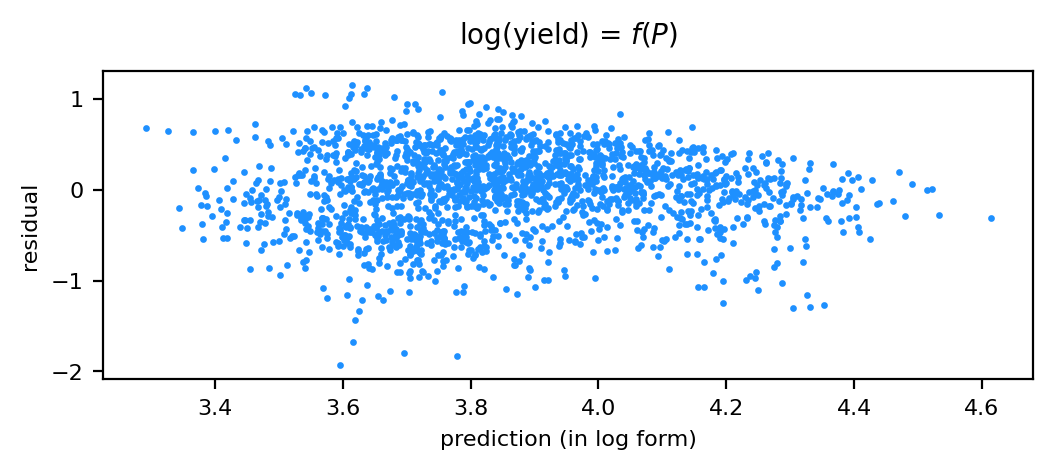

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(6, 2), sharex=True, 
                         gridspec_kw={"hspace": 0.25, "wspace": 0.05}, dpi=dpi_)

axes.scatter(m5.predy, m5.u, c="dodgerblue", s=2);

title_ = f"log(yield) = $f(P)$"
axes.set_title(title_, fontsize=10);
axes.set_xlabel("prediction (in log form)"); axes.set_ylabel("residual");

fig_name = wheat_plot_dir + "logYield_PrecipReg.pdf"
plt.savefig(fname=fig_name, dpi=200, bbox_inches="tight")

In [ ]:
depen_var, indp_vars = "yield", ["all_gdd"]

m5 = spreg.OLS_Regimes(y = df_year[depen_var].values,  x = df_year[indp_vars].values, 
                       regimes = df_year["variety"].tolist(),
                       constant_regi="many",          
                       regime_err_sep=False,
                       name_y=depen_var,
                       name_x=indp_vars)

m5_results = pd.DataFrame({"Coeff.": m5.betas.flatten(), 
                           "Std. Error": m5.std_err.flatten(), # Pull out and flatten standard errors
                           "P-Value": [i[1] for i in m5.t_stat], # Pull out P-values from t-stat object
                           }, index=m5.name_x)

m5_results.transpose()

In [ ]:
depen_var, indp_vars = "yield", ["all_gdd", "all_precip"]

m5 = spreg.OLS_Regimes(y=df_year[depen_var].values, x=df_year[indp_vars].values, 
                       regimes = df_year["variety"].tolist(),
                       constant_regi="many", regime_err_sep=False,
                       name_y=depen_var, name_x=indp_vars)

m5_results = pd.DataFrame({"Coeff.": m5.betas.flatten(),
                           "Std. Error": m5.std_err.flatten(),
                           "P-Value": [i[1] for i in m5.t_stat],}, 
                          index=m5.name_x)
m5_results.transpose()

In [ ]:
depen_var, indp_vars = "yield", ["all_gdd", "all_precip"]

m5 = spreg.OLS(y = df_year[depen_var].values, x = df_year[indp_vars].values, 
               name_y=depen_var, name_x=indp_vars)

m5_results = pd.DataFrame({"Coeff.": m5.betas.flatten(),
                           "Std. Error": m5.std_err.flatten(),
                           "P-Value": [i[1] for i in m5.t_stat],}, 
                          index=m5.name_x)
m5_results.transpose()